<a href="https://colab.research.google.com/github/theabhinav0231/dive_into_deep_learning_book/blob/main/07_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successful

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

Compute 2D cross-correlation

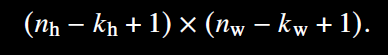

In [2]:
def corr2d(X, K):
  h, w = K.shape
  Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
  return Y

In [3]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 0.1], [2.0, 3.0]])
corr2d(X, K)

tensor([[18.1000, 23.2000],
        [33.4000, 38.5000]])

In [4]:
class Conv2D(nn.Module):
  def __init__(self, kernel_size):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(kernel_size))
    self.bias = nn.Paraneter(torch.zeros(1))

  def forward(self, x):
    return corr2d(x, self.weight) + self.bias

## **Object Edge Detection in Images**

For this we construct an "image" of 6 X 8 pixels. The middle four columns are black (0) and the rest are white (1).

In [5]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

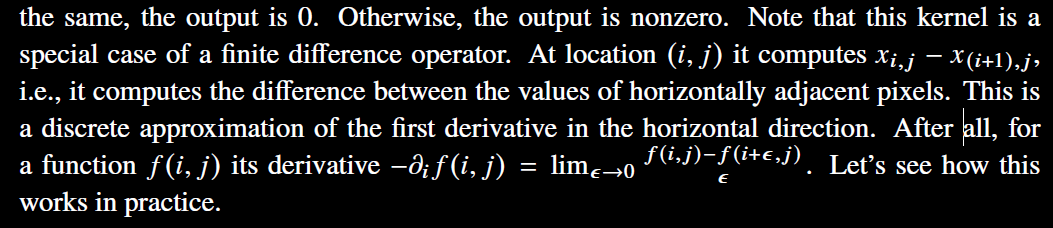

In [6]:
K = torch.tensor([[1.0, -1.0]])

We are ready to perform the cross-correlation operation with arguments X (our input) and
K (our kernel). As you can see, we detect 1 for the edge from white to black and -1 for the
edge from black to white. All other outputs take value 0.

In [7]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

Now applying our new kernel to transposed image. All elements turns to 0. The Kernel only detects vertical edges.

In [8]:
X.t()

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [9]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

Designing an edge detector by finite differences [1, -1] is neat if we know this is precisely
what we are looking for. However, as we look at larger kernels, and consider successive
layers of convolutions, it might be impossible to specify precisely what each filter should
be doing manually.

Now let’s see whether we can learn the kernel that generated Y from X by looking at the
input–output pairs only. We first construct a convolutional layer and initialize its kernel as
a random tensor. Next, in each iteration, we will use the squared error to compare Y with the
output of the convolutional layer. We can then calculate the gradient to update the kernel.
For the sake of simplicity, in the following we use the built-in class for two-dimensional
convolutional layers and ignore the bias.

In [10]:
# construct a 2D convolutional layer with 1 output channel and a kernel of shape (1, 2)
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

# the 2D convolutional layer uses 4D input and output in the format of
# (example, channel, height, width) where batch size (no. of examples in the batch)
# and the no. of channels are both 1

X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2

for i in range(10):
  Y_hat = conv2d(X)
  l = (Y_hat - Y) ** 2
  conv2d.zero_grad()
  l.sum().backward()
  # update the kernel
  conv2d.weight.data[:] -= lr * conv2d.weight.grad
  if (i + 1) % 2 == 0:
    print(f"Epoch: {i + 1}, Loss: {l.sum():.3f}")

Epoch: 2, Loss: 12.232
Epoch: 4, Loss: 2.178
Epoch: 6, Loss: 0.417
Epoch: 8, Loss: 0.091
Epoch: 10, Loss: 0.024


In [11]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9697, -0.9947]])

## **Padding**

In the following example, we create a two-dimensional convolutional layer with a height
and width of 3 and apply 1 pixel of padding on all sides. Given an input with a height and
width of 8, we find that the height and width of the output is also 8.

X = X.reshape((1, 1) + X.shape)

Here, the purpose of reshaping is to prepare the input tensor X to match the expected input format for a 2D convolution operation.

X.shape -> Gives the shape of X, i.e. (H, W) or (Height, Width)

(1, 1) is prepended to the X resulting in (1, 1, H, W)

Changing this to -> (batch_size, channels, height, width)

batch_size = 1

channels = 1 (greyscale)

Height and Width -> Dimensions of the input


In [12]:
def comp_conv2d(conv2d, X):
  X = X.reshape((1, 1) + X.shape)
  Y = conv2d(X)
  # strip the first two dimesions: examples and channels
  return Y.reshape(Y.shape[2:])

# 1 row and 1 column is padded on either side, so a total of 2 rows and 2 columns are added
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

When the height and width of the convolution kernel are different, we can make the output
and input have the same height and width by setting different padding numbers for height
and width.

In [13]:
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

## **Stride**

In [14]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [15]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

## **Multi Input Channels**

If our
convolution kernel’s window shape is 𝑘h x 𝑘w, then, when 𝑐i = 1 (channel inputs), we can think of our
convolution kernel as just a two-dimensional tensor of shape 𝑘h x 𝑘w.

However, when 𝑐i > 1, we need a kernel that contains a tensor of shape 𝑘h x 𝑘w for every
input channel. Concatenating these 𝑐i tensors together yields a convolution kernel of
shape 𝑐i x 𝑘h x 𝑘w.

Since the input and convolution kernel each have 𝑐i channels, we canperform a cross-correlation operation on the two-dimensional tensor of the input and the
two-dimensional tensor of the convolution kernel for each channel, adding the 𝑐i results
together (summing over the channels) to yield a two-dimensional tensor. This is the result
of a two-dimensional cross-correlation between a multi-channel input and a multi-inputchannel
convolution kernel.

All we are doing is performing a cross-correlation operation per channel and then adding up the results.


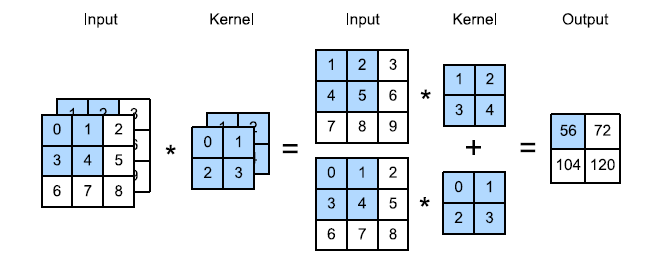

In [16]:
def corr2d_multi_in(X, K):
  # iterate through the 0th dimension (channel) of K and then ass then up
  return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [17]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
    [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

## **Multi Output Channels**

Denote by 𝑐i and 𝑐o the number of input and output channels, respectively, and by 𝑘h and 𝑘w
the height and width of the kernel. To get an output with multiple channels, we can create
a kernel tensor of shape 𝑐i x 𝑘h x 𝑘w for every output channel. We concatenate them on the
output channel dimension, so that the shape of the convolution kernel is 𝑐o x 𝑐i x 𝑘h x 𝑘w.
In cross-correlation operations, the result on each output channel is calculated from the
convolution kernel corresponding to that output channel and takes input from all channels
in the input tensor.

Code - Iterate thrugh the 0th dimesnion of K and each time perform cross-correlation operations with the input X. All of the results are then stacked together.

In [18]:
def corr2d_multi_in_out(X, K):
  return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [19]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [20]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [21]:
def corr2d_multi_in_out_1x1(X, K):
  c_i, h, w = X.shape
  c_o = K.shape[0]
  X = X.reshape((c_i, h * w))
  K = K.reshape((c_o, c_i))
  Y = torch.matmul(K, X)
  return Y.reshape((c_o, h, w))

In [23]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

Given an image of size ¹ℎ x 𝑤º, the cost
for computing a 𝑘 x 𝑘 convolution is O(ℎ x 𝑤 x 𝑘2). For 𝑐i and 𝑐o input and output channels
respectively this increases to O(ℎ x 𝑤 x 𝑘2 x 𝑐i x 𝑐o). For a 256 x 256 pixel image with a
5 x 5 kernel and 128 input and output channels respectively this amounts to over 53 billion
operations.